In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from collections import Counter

In [2]:
pip install textblob


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
data = pd.read_csv('video_id_info (Recovered).csv', encoding='latin1',low_memory=False) 

In [4]:
data

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day â¼ï¸â¼ï¸â¼ï¸,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending ð,3,0
...,...,...,...,...
691397,EoejGgUNmVU,ÐÑÑÑÐ°Ñ,1,0
691398,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes Ã Roa...,0,0
691399,EoejGgUNmVU,Ven a mexico! ð te amo LP,0,0
691400,EoejGgUNmVU,IslÄ±ÄÄ± yeter...,0,0


In [5]:
data.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [8]:
data.describe()

,video_id,comment_text,likes,replies
count,691376,691376,691376,691376
unique,2266,434064,1064,373
top,XpVt6Z1Gjjo,Lol,0,0
freq,800,310,563723,649337


# Sentiment Analysis


In [9]:
def get_sentiment(text):
    blob = TextBlob(str(text))
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [10]:
data['sentiment'] = data['comment_text'].apply(get_sentiment)

In [11]:
sentiment_counts = data['sentiment'].value_counts()
print(sentiment_counts)

sentiment
Positive    300426
Neutral     284884
Negative    106066
Name: count, dtype: int64


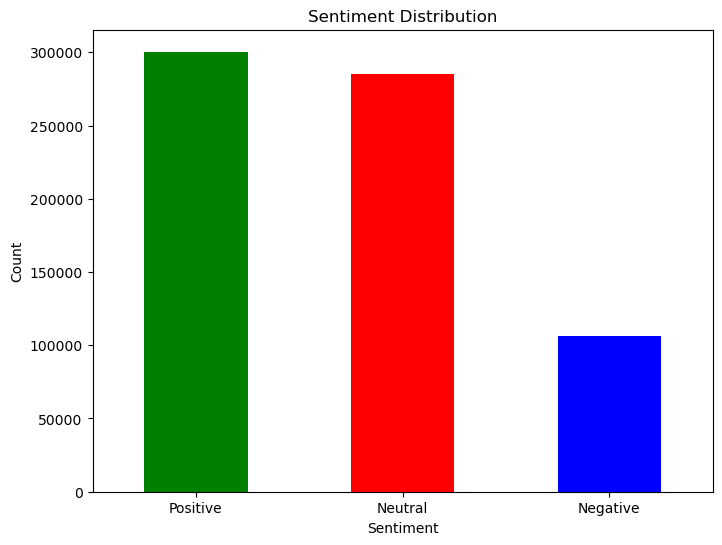

In [12]:
data['sentiment'] = data['comment_text'].apply(get_sentiment)
sentiment_counts = data['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# The sentiment analysis results indicate that out of the total count, there are 300,426 instances classified as positive, 284,884 instances classified as neutral, and 106,066 instances classified as negative.

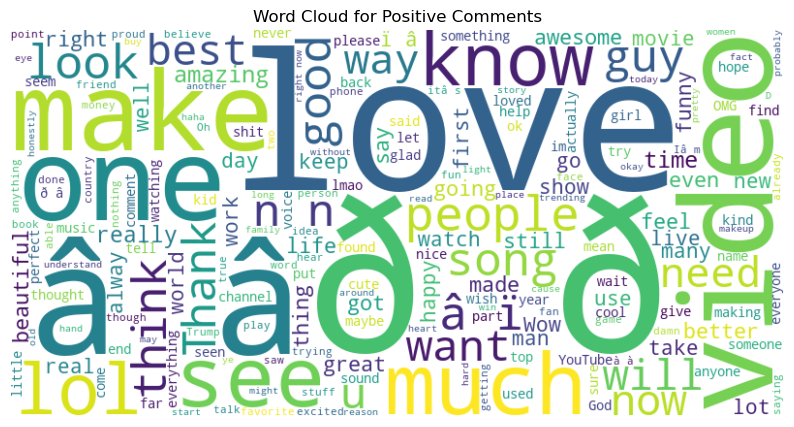

In [13]:
data['sentiment'] = data['comment_text'].apply(get_sentiment)
positive_comments = data[data['sentiment'] == 'Positive']['comment_text']
positive_words = ' '.join(positive_comments).split()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_words))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Comments')
plt.axis('off')
plt.show()

# Based on the word cloud for positive comments, it appears that words such as "love," "best," "amazing," "fun," "great," and "awesome" are among the most frequently used.

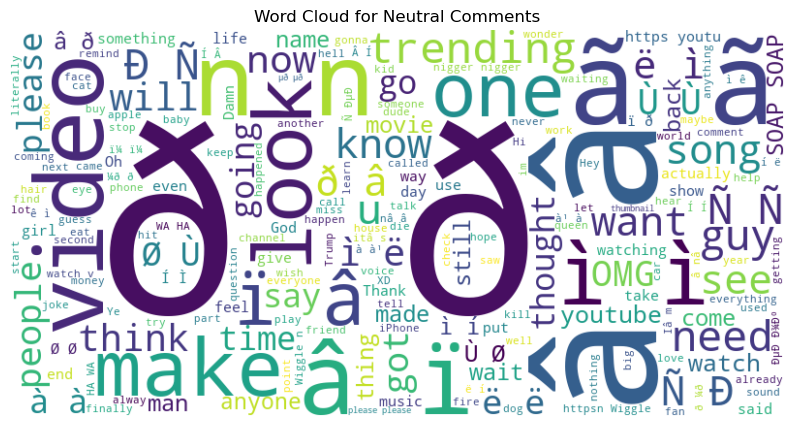

In [29]:
data['sentiment'] = data['comment_text'].apply(get_sentiment)
neutral_comments = data[data['sentiment'] == 'Neutral']['comment_text']
neutral_words = ' '.join(neutral_comments).split()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(neutral_words))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Neutral Comments')
plt.axis('off')
plt.show()


# Based on the word cloud for neutral comments, it appears that words such as "think," "going," "make," "one," "want," and "song" are among the most frequently used. 

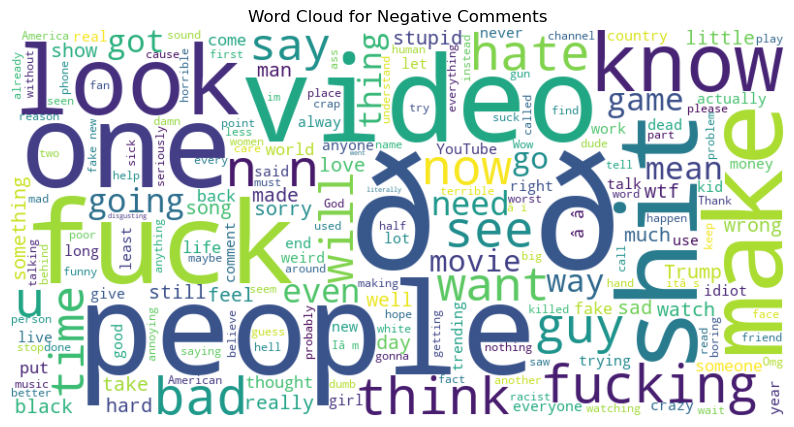

In [14]:
data['sentiment'] = data['comment_text'].apply(get_sentiment)
negative_comments = data[data['sentiment'] == 'Negative']['comment_text']
negative_words = ' '.join(negative_comments).split()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_words))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Comments')
plt.axis('off')
plt.show()

# Based on the word cloud for negative comments, it seems that words such as "hate," "fake," "stupid," "bad," "fucking," and "idiot" are among the most frequently used.

# Word Frequency Analysis

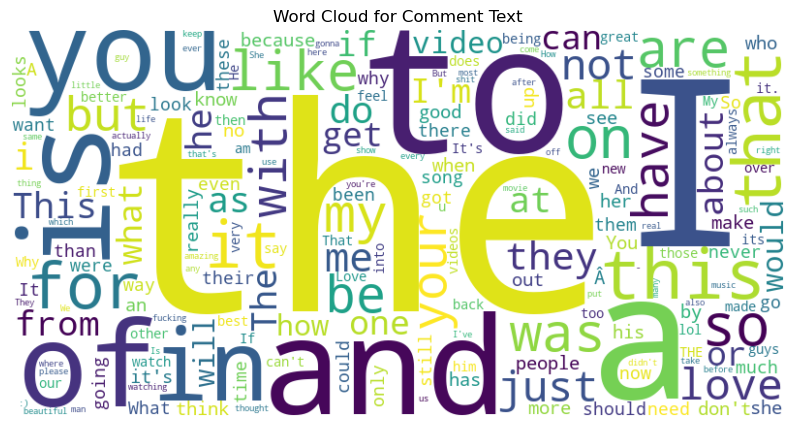

In [15]:
all_comments = ' '.join(data['comment_text']).split()
word_counts = Counter(all_comments)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Comment Text')
plt.axis('off')
plt.show()



# Based on the word cloud for comment text, it seems that words such as "you," "the," "to," "and," "of," "is," "that," "in," "it," and "for" are among the most frequently used.

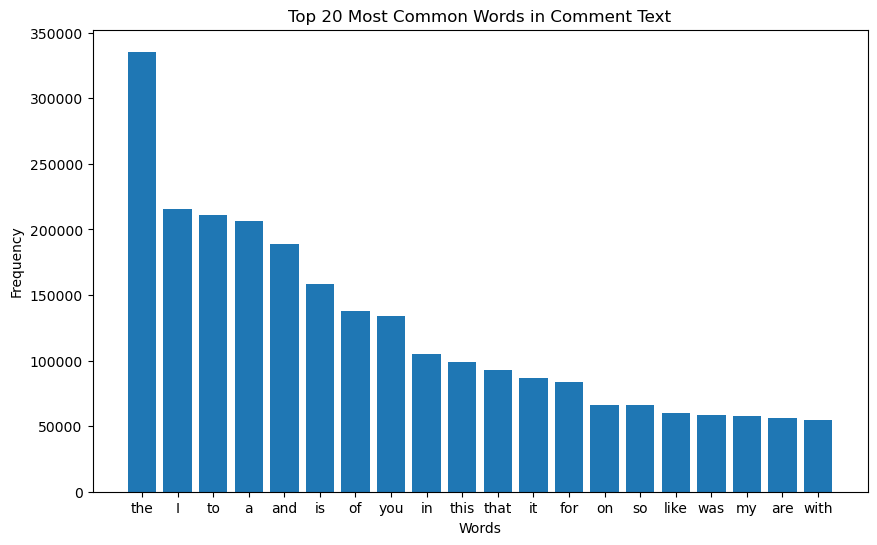

In [16]:
# Alternatively, visualize the most common words using a bar plot
most_common_words = word_counts.most_common(20)
words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title('Top 20 Most Common Words in Comment Text')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


# Based on the bar chart showing the top 20 most common words in comment text, it's evident that common words like "the," "I," "to," "a," and "and" are highly frequent. 

# Sentiment Analysis with Emojis: 

In [17]:
pip install emoji==2.10.1

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [18]:
import emoji

In [19]:
data['comment_text'].head(10)

0        Logan Paul it's yo big day â¼ï¸â¼ï¸â¼ï¸
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                        trending ð
5                              #1 on trending AYYEEEEE
6                    The end though ð­ðð»â¤ï¸
7                                 #1 trending!!!!!!!!!
8                          Happy one year vlogaversary
9    You and your shit brother may have single hand...
Name: comment_text, dtype: object

In [20]:
comment=("trending 😉")

In [21]:
[char for char in comment if char in emoji.EMOJI_DATA]

['😉']

In [22]:
emoji_list=[]

In [23]:
emoji_List =[]

for char in comment:
    if char in emoji.EMOJI_DATA:
        emoji_list.append(char)
        
emoji_List

[]

In [24]:
all_emoji_list = []

for comment in data["comment_text"].dropna():
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emoji_list.append(char)

In [28]:
all_emoji_list[0:10]

['®', '®', '®', '®', '®', '®', '®', '®', '®', '®']

In [26]:
from collections import Counter

In [27]:
Counter(all_emoji_list).most_common(10)

[('©', 7436), ('®', 3262)]

# majority of customers are happy as most of them are using emojis like happy , heart , nice , fire  and lovely